Logs
- [2023/03/03]   
  Restart this notebook if you change the scratch library

- [2024/02/05]   
  `%load_ext` and `%autoreload` magic commands avoid restarting this notebook
  when you change the scratch library.   
  Probably you need to install `tabulate` and `seaborn`

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from typing import List
from collections import Counter
from scratch.linear_algebra import LinearAlgebra as la
from tabulate import tabulate
from IPython.display import display

In [ ]:
%load_ext autoreload
%autoreload 2 

In [4]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

# Statistics

## Describing a Single Set of Data

In [5]:
# A collection of the number of friends from 204 people.
num_friends = [
    100, 49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 
     14, 14, 13, 13, 13, 13, 12, 12, 11, 10, 10, 10, 10, 10, 10, 10,
     10, 10, 10, 10, 10, 10, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9,
      9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,
      8,  8,  8,  8,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  7, 
      7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
      6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  5,  5,
      5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  4,
      4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
      4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
      3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
      2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
      1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]

# How many minutes per day each user spends on DataSciencester website
daily_minutes = [
      1, 68.77, 51.25, 52.08, 38.36, 44.54, 57.13,  51.4, 41.42, 31.22,
  34.76, 54.01, 38.79, 47.59,  49.1, 27.66, 41.03, 36.73, 48.65, 28.12,
  46.62, 35.57, 32.98,    35, 26.07, 23.77, 39.73, 40.57, 31.65, 31.21,
  36.32, 20.45, 21.93, 26.02, 27.34, 23.49, 46.94,  30.5,  33.8, 24.23,
   21.4, 27.94, 32.24, 40.57, 25.07, 19.42, 22.39, 18.42, 46.96, 23.72,
  26.41, 26.97, 36.76, 40.32, 35.02, 29.47,  30.2,    31, 38.11, 38.18,
  36.31, 21.03, 30.86, 36.07, 28.66, 29.08, 37.28, 15.28, 24.17, 22.31,
  30.17, 25.53, 19.85, 35.37,  44.6, 17.23, 13.47, 26.33, 35.02, 32.09,
  24.81, 19.33, 28.77, 24.26, 31.98, 25.73, 24.86, 16.28, 34.51, 15.23,
  39.72,  40.8, 26.06, 35.76, 34.76, 16.13, 44.04, 18.03, 19.65, 32.62,
  35.59, 39.43, 14.18, 35.24, 40.13, 41.82, 35.45, 36.07, 43.67, 24.61,
   20.9,  21.9, 18.79, 27.61, 27.21, 26.61, 29.77, 20.59, 27.53, 13.82,
   33.2,    25,  33.1, 36.65, 18.63, 14.87,  22.2, 36.81, 25.53, 24.62,
  26.25, 18.21, 28.08, 19.42, 29.79,  32.8, 35.99, 28.32, 27.79, 35.88,
  29.06, 36.28,  14.1, 36.63, 37.49,  26.9, 18.58, 38.48, 24.48, 18.95,
  33.55, 14.24, 29.04, 32.51, 25.63, 22.22,    19, 32.73, 15.16,  13.9,
   27.2, 32.01, 29.27,    33, 13.74, 20.42, 27.32, 18.23, 35.35, 28.48,
   9.08, 24.62, 20.12, 35.26, 19.92, 31.02, 16.49, 12.16,  30.7, 31.22,
  34.65, 13.13, 27.51,  33.2, 31.57,  14.1, 33.42, 17.44, 10.12, 24.42,
   9.82, 23.39, 30.93, 15.03, 21.67, 31.09, 33.29, 22.61, 26.89, 23.48,
   8.38, 27.81, 32.35, 23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

### How many people who have specific number of friends

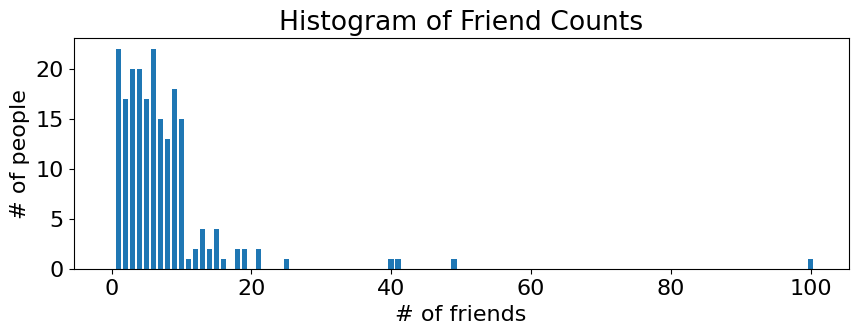

In [6]:
fig, ax = plt.subplots(figsize=(10, 3))

friend_counts = Counter(num_friends)

xs = range(101)
ys = [friend_counts[x] for x in xs]

ax.bar(xs, ys)   # instead using .bar(), we can use .hist(), but the code
                 # a little bit more complicated, because we have to specify
                 # the bin width
ax.set_xlabel("# of friends")
ax.set_ylabel("# of people")
ax.set_title("Histogram of Friend Counts")
# ax.grid("on")
plt.show(fig)

It is not enough just to present the above chart without the following statistics

In [7]:
num_points = len(num_friends)    # 204

largest_value = max(num_friends)        # 100
smallest_value = min(num_friends)       # 1

# another way around to get smallest value by sorting the data
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]         # 1
second_smallest_value = sorted_values[1]  # 1
second_largest_value = sorted_values[-2]  # 49

### Central Tendencies

In [8]:
def mean(xs: List[float]) -> float:
  return sum(xs) / len(xs)

mean(num_friends)     # 7.33333

7.333333333333333

Define a function to calculate the median

In [9]:
# The underscores indicates that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library
def _median_odd(xs: List[float]) -> float:
  """If len(xs) is odd, the median is the middle"""
  return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
  """If len(xs) is even, it's the average of the middle two elements"""
  sorted_xs = sorted(xs)
  hi_midpoint = len(xs) // 2      # e.g. length 4 => hi_midpoint 2
  return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
  """Finds the 'middle-most' value of v"""
  return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [10]:
assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

The median number of friends

In [11]:
median(num_friends)

6.0

Note: mean is very sensitive to the change of each value in the given data.  
For example, if the friendliest user (the user who is 100 friends) changes   
the number of friends from 100 to 200, the mean would rise to 7.82.  
This change would not make the median rising.   
We can conclude any outliers will also change significantly to the mean

A real example misleading because of mean:   
The story is often told that in the mid-1980s, the major at the University of   
Nort Carolina with the highest average starting salary was **geography**, mostly  
because of NBA star (and outlier) Michael Jordan.

A generalization of the median is the _quantile_

In [12]:
def quantile(xs: List[float], p: float) -> float:
  """Returns the pth-percentile value in x"""
  p_index = int(p * len(xs))
  return sorted(xs)[p_index]

In [13]:
assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

Less common central tendencies are _mode_

In [14]:
def mode(x: List[float]) -> List[float]:
  """Returns a list, since there might be more than one mode"""
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items()
          if count == max_count]

Using set, we can assert much easier without considering the order
of the elements

In [15]:
assert set(mode(num_friends)) == {1, 6}

### Dispersion

_Dispersion_ is a quantity to measure of how spread out our data is.

In [16]:
# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
  return max(xs) - min(xs)

In [17]:
assert data_range(num_friends) == 99

Range has similar property to the median. It is not very sensitive to 
the change of the data.

A more complex measure of dispersion is the _variance_.

In [18]:
def de_mean(xs: List[float]) -> List[float]:
  """Translate xs by subtracting its mean (so the result has mean 0)"""
  x_bar = mean(xs)
  return [x - x_bar for x in xs]


def variance(xs: List[float]) -> float:
  """Almost the average squared deviation from the mean"""
  assert len(xs) >= 2, "variance requries at least two elements"

  n = len(xs)
  deviations = de_mean(xs)
  return la.sum_of_squares(deviations) / (n - 1)

In [19]:
assert 81.54 < variance(num_friends) < 81.55

In [20]:
def standard_deviation(xs: List[float]) -> float:
  """The standard deviation is the square root of the variance"""
  return np.sqrt(variance(xs))

In [21]:
assert 9.02 < standard_deviation(num_friends) < 9.04

Variance, standard deviation, and mean have the same outlier problems.   
Changing a single value to a very high or low, change those central tendencies.

The following is the robust alternative to compute dispersion using 
IQD (interquartile range).  
This quantity mostly used in the boxplot

In [22]:
def interquartile_range(xs: List[float]) -> float:
  """Returns the difference between the 75%-ile and the 25%-ile"""
  return quantile(xs, 0.75) - quantile(xs, 0.25)

In [23]:
assert interquartile_range(num_friends) == 6

## Correlation

Covariance is analogue of variance. Whereas variance measures how a single   
variable deviates from its mean, covariance measures how two variables vary  
in tandem from their means.

In [24]:
def covariance(xs: List[float], ys: List[float]) -> float:
  """Arguments:
      - xs [List] = list of float number"""
  assert len(xs) == len(ys), "xs and ys must have the same number of elements"

  return la.dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)   # sample covariance formula

In [25]:
assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

Problem in covariance:
- The units are the product of the input's units, which can be hard to make 
  sense of 

- If each input in one variables are set to be two times larger than original  
  and other variable is set to be fixed, the convarianc would be twice as  
  large. This arise a difficulty to say what the large convariance means

  Proof:
  $$
    \operatorname{cov}(X, Y)
      = \frac{1}{N-1} \sum_{i=1}^N (X_i - \overline{X})(Y_i - \overline{Y})
  $$

  Set $X$ to be two times larger than original ($X' = 2X$)
  $$
  \begin{align*}
    \operatorname{cov}(X', Y)
      &= \frac{1}{N-1} \sum_{i=1}^N (2 X_i - 2\overline{x})(Y_i - \overline{Y}) \\
      &= 2 \operatorname{cov}(X, Y)
  \end{align*}
  $$
  

A better dispersion than covariance, we have correlation which is 
a covariance divided by their standard deviations

In [26]:
def correlation(xs: List[float], ys: List[float]) -> float:
  """Measures how much xs and ys vary in tandem about their means"""
  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)

  if stdev_x > 0  and stdev_y > 0:
    return covariance(xs, ys) / stdev_x / stdev_y
  else:
    return 0        # if no variation, correlation is zero

In [27]:
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

### Correlation with an outlier

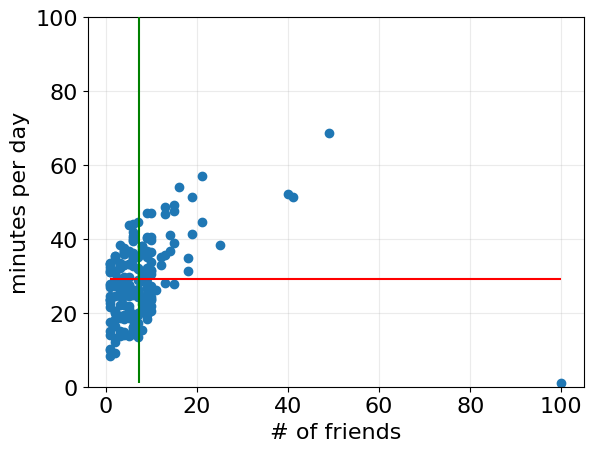

In [28]:
fig, ax = plt.subplots()

ax.plot(num_friends, daily_minutes, marker='o', linestyle="None")

ax.set_ylim([0, 100])
ax.grid("on")
ax.set_xlabel("# of friends")
ax.set_ylabel("minutes per day")

ax.hlines(np.mean(daily_minutes), 
  min(num_friends), max(num_friends), color="r", zorder=3)
ax.vlines(np.mean(num_friends), min(num_friends), max(num_friends),
  color="g", zorder=4)

plt.show(fig)

In [29]:
covariance(num_friends, daily_minutes)

22.425435139573064

In [30]:
# two times of `num_friends`
covariance([2*n for n in num_friends], daily_minutes)

44.85087027914613

In [31]:
correlation(num_friends, daily_minutes)

0.24736957366478218

Ignoring the outlier (a person who has 100 friends)

In [32]:
outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

In [33]:
assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

Without the outlier, there is a much stronger correlation
(from 0.24 to 0.57).

Is there any plot that can make a contrast difference about this change
in correlation?

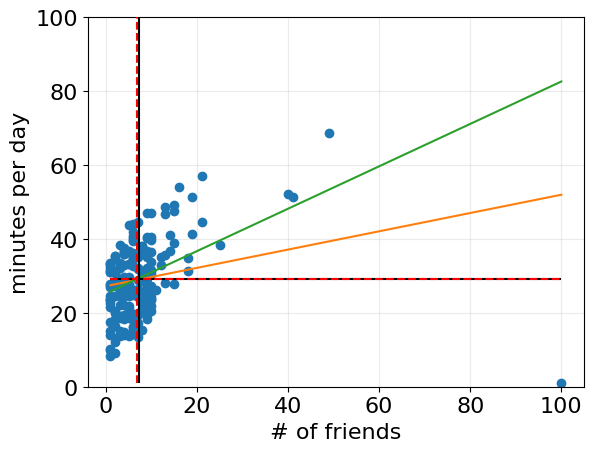

In [57]:
fig, ax = plt.subplots()

ax.plot(num_friends, daily_minutes, marker='o', linestyle="None")

ax.set_ylim([0, 100])
ax.grid("on")
ax.set_xlabel("# of friends")
ax.set_ylabel("minutes per day")

ax.hlines(np.mean(daily_minutes), 
  min(num_friends), max(num_friends), color="k", zorder=3)
ax.vlines(np.mean(num_friends), min(num_friends), max(num_friends),
  color="k", zorder=4)

ax.hlines(np.mean(daily_minutes_good), min(num_friends), max(num_friends), 
          linestyle="--", color="r", zorder=3)
ax.vlines(np.mean(num_friends_good), min(num_friends), max(num_friends),
          linestyle="--", color="r", zorder=4)

x_data = np.linspace(min(num_friends), max(num_friends), 5)
ax.plot(x_data, correlation(num_friends, daily_minutes)\
                *(x_data - np.mean(num_friends)) + np.mean(daily_minutes))
ax.plot(x_data, correlation(num_friends_good, daily_minutes_good)\
                *(x_data - np.mean(num_friends_good)) + np.mean(daily_minutes_good))

plt.show(fig)


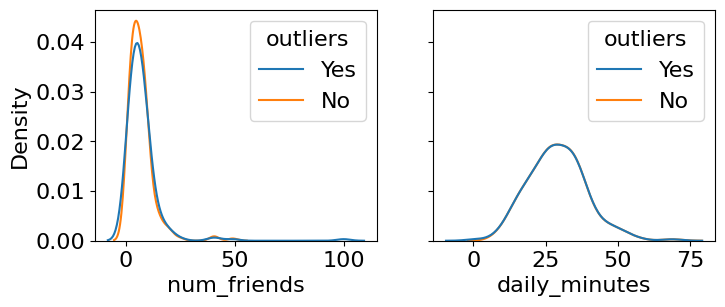

In [49]:
df_num_friends = pd.DataFrame(
  {"num_friends": num_friends + num_friends_good,
   "outliers": ["Yes" for _ in range(len(num_friends))]
               + ["No" for _ in range(len(num_friends_good))]})
df_daily_minutes = pd.DataFrame(
  {"daily_minutes": daily_minutes + daily_minutes_good,
   "outliers": ["Yes" for _ in range(len(daily_minutes))]
               + ["No" for _ in range(len(daily_minutes_good))]}
)

fig, axes = plt.subplots(ncols=2, figsize=(8, 3), sharey=True)

sns.kdeplot(data=df_num_friends, x="num_friends", hue="outliers", ax=axes[0])
sns.kdeplot(data=df_daily_minutes, x="daily_minutes", hue="outliers", ax=axes[1])

plt.subplots_adjust(wspace=0.2)
plt.show(fig)

## Simpson's Paradox

In [15]:
table = [
  ["West Coast", 101, 8.2],
  ["East Coast", 103, 6.5]]
headers = ["Coast", "# of members", "Avg. # of friends"]

print(tabulate(table, headers, tablefmt="simple"))

Coast         # of members    Avg. # of friends
----------  --------------  -------------------
West Coast             101                  8.2
East Coast             103                  6.5


It certainly looks like the West Coast data scientists 
are friendlier than the East Coast data scientists.

In [14]:
table = [
  ["West Coast", "PhD", 35, 3.1],
  ["East Coast", "PhD", 70, 3.2],
  ["West Coast", "No PhD", 66, 10.9],
  ["East Coast", "No PhD", 33, 13.4]]

headers = ["Coast", "Degree", "# of members", "Avg. # of friends"]

print(tabulate(table, headers, tablefmt="simple"))

Coast       Degree      # of members    Avg. # of friends
----------  --------  --------------  -------------------
West Coast  PhD                   35                  3.1
East Coast  PhD                   70                  3.2
West Coast  No PhD                66                 10.9
East Coast  No PhD                33                 13.4


Bucketing the data as East Coast/West Coast disguised the fact
that the East Coast/West Coast disguised the fact that the 
East Coast data scientists skew much more heavily toward PhD
types.

The below image is another example that will show this kind of paradox   

<img src="./img-resources/Simpsons_paradox_-_animation.gif" width=700></img>

## Some other correlational caveats

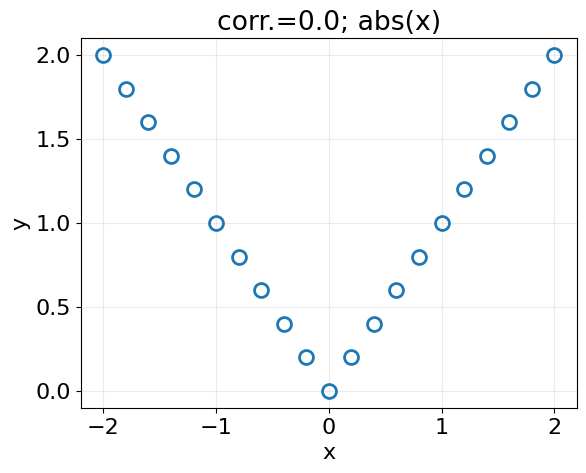

In [73]:
fig, ax = plt.subplots()

# x = [-2, -1, 0, 1, 2]
# y = [ 2,  1, 0, 1, 2]

x = np.linspace(-2, 2, 21)
y = np.abs(x)

ax.plot(x, y, marker="o", markersize=10, markerfacecolor="None", 
  linestyle="None", markeredgewidth=2)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid("on")
ax.set_title(f"corr.={correlation(x, y)}; abs(x)")

plt.show(fig)

$x$ and $y$ have zero correlation, but they certainly have a relationship
$\operatorname{abs}(x)$

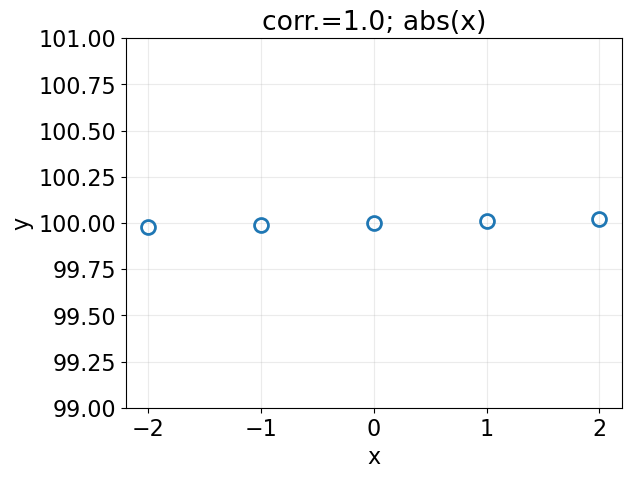

In [32]:
fig, ax = plt.subplots()

x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

ax.plot(x, y, marker="o", markersize=10, markerfacecolor="None", 
  linestyle="None", markeredgewidth=2)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([99, 101])
ax.grid("on")
ax.set_title(f"corr.={correlation(x, y)}; abs(x)")

plt.show(fig)


Correlation tells you nothing about how large the relationship is

## Correlation and Causation

Not all high correlations mean that there is a causation.   
Source: [spurious correlation](https://www.tylervigen.com/spurious-correlations)

<img src="./img-resources/spurious-corr.png" width=700></img>